Assess performance of the Bayesian Mixture models with different datasets, variables and parameter values

In [309]:
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
import pandas as pd 
from matplotlib import pyplot as plt
# from rdt.transformers import BayesGMMTransformer ## <-- implementation of the BGMM in the version of rdt in this package

In [310]:
data_map = {
    "adult": {
        "path": "../datasets/Adult/Real/real_adult_data.csv",
        "numvars": ["fnlwgt", "hours-per-week", "education-num", "age", "capital-gain", "capital-loss"] 
    },
    "census": {
        "path": "../datasets/Census/Real/real_census_data.csv",
        "numvars": ["age", "wage per hour", "capital gains", "capital losses", "dividends from stocks", "num persons worked for employer", "weeks worked in year"]
    },
    "intrusion": {
        "path": "../datasets/Intrusion/Real/real_intrusion_data.csv",
        "numvars": ["duration", "src_bytes", "dst_bytes", "wrong_fragment", "hot", "num_failed_logins",
                    "num_compromised", "num_root", "num_file_creations", "num_access_files",
                    "count", "srv_count", "serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
                    "diff_srv_rate", "srv_diff_host_rate"]
    }
}

In [311]:
# set parameters here 
use_dataset = "intrusion"
sample_size = 100_000

Load data

In [312]:
data = pd.read_csv(data_map[use_dataset]["path"])
if "Unnamed: 0" in data.columns:
    data = data.drop(columns=["Unnamed: 0"])

sample_size = min(data.shape[0], sample_size)
data = data.sample(n=sample_size)
data.describe()


,duration,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,num_root,num_file_creations,num_access_files,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate
count,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,46.236360,1.265492e+03,9.487984e+02,0.006110,0.034870,0.000170,0.148450,0.007890,0.008080,0.001170,0.001050,331.619650,292.070390,0.175240,0.176190,0.056100,0.058330,0.771870,0.004860,0.016640
std,653.565637,3.964673e+04,3.612926e+04,0.130816,0.780871,0.017029,0.355547,0.892903,0.900357,0.114319,0.034481,213.206245,246.420555,0.380174,0.380984,0.230116,0.234368,0.419629,0.069544,0.127919
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,40232.000000,5.135678e+06,5.151049e+06,3.000000,30.000000,4.000000,1.000000,281.000000,278.000000,22.000000,2.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [313]:
varnames = data_map[use_dataset]["numvars"]
n = len(varnames)

In [314]:
[v for v in varnames if v not in data.columns]

[]

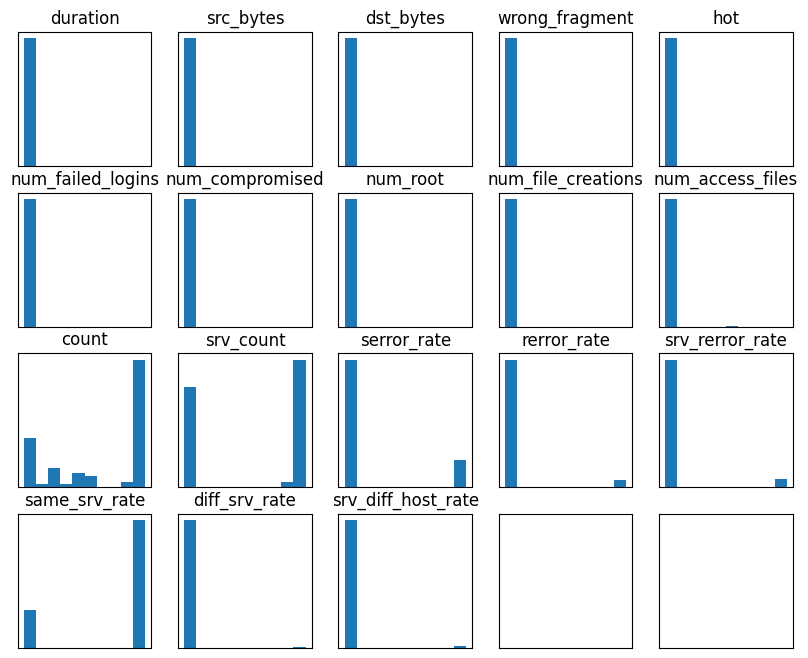

In [331]:
nrows = 4
if n % nrows == 0:
    ncols = n / nrows 
else:    # print((rowid, colid))
    ncols = n// nrows + 1
fig, axs = plt.subplots(nrows, ncols, figsize=(10, 8))

rowid = 0 
colid = 0
# Iterate over columns and rows to plot
for i in range(ncols*nrows):
    ax = axs[rowid, colid]

    if i < len(varnames):
        v = varnames[i]
        ax.hist(data[v])
        ax.title.set_text(v)  

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    if colid < ncols-1:
        colid += 1
    else:
        rowid += 1
        colid = 0
        



In [177]:
print(varnames)

['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'hot', 'num_failed_login', 'num_compromised', 'num_root', 'num_file_creations', 'num_access_files', 'count', 'srv_count', 'serror_rate', 'rerror_rate', 'srv_error_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate']


In [324]:
varname = "count"
data[varname].describe()

count    100000.000000
mean        331.619650
std         213.206245
min           1.000000
25%         117.000000
50%         510.000000
75%         511.000000
max         511.000000
Name: count, dtype: float64

In [179]:

def fit_gmm(x, init_params="random"):
    gm = GaussianMixture(
        n_components=3,
        covariance_type='full',
        n_init=5 , #10
        max_iter=2000, #1000
        warm_start=True,
        init_params=init_params,
    )
    gm.fit(x.reshape(-1, 1))

    valid_component_indicator = gm.weights_
    # num_components = valid_component_indicator.sum()

    return valid_component_indicator



def fit_bgmm(x, init_params="random"):
    gm = BayesianGaussianMixture(
        n_components=3,
        covariance_type='full',
        weight_concentration_prior_type='dirichlet_process',  # special for B-GMM
        weight_concentration_prior=1e-3, # special
        n_init=5 , #10
        max_iter=2000, #1000
        warm_start=True,
        init_params=init_params,
    )
    gm.fit(x.reshape(-1, 1))

    valid_component_indicator = gm.weights_
    # num_components = valid_component_indicator.sum()

    return valid_component_indicator

def sequential_function(data, variables, init_params="random"):
    output = []
    for v in variables:
        x = data[v].values
        output.append(fit_bgmm(x, init_params=init_params))
    return output 
    


### Notes 
- The routine uses all CPU cores already

### Performance on a single variable

<Axes: >

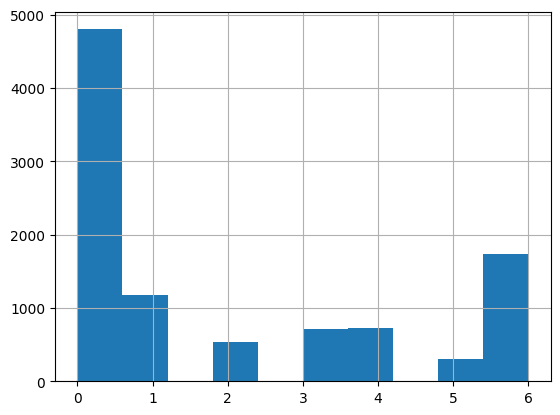

In [272]:
data[varname].hist()

In [325]:
display(fit_bgmm(data[varname].values))
display(fit_bgmm(data[varname].values), "kmeans")
# display(fit_gmm(data[varname].values)) 

array([0.5288666 , 0.19067561, 0.28045779])

array([0.52886659, 0.28046777, 0.19066564])

'kmeans'

In [326]:
%timeit -r 1 -n 1 fit_bgmm(data[varname].values)

8.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [327]:
%timeit -r 1 -n 1 fit_bgmm(data[varname].values, "kmeans") 

3.06 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Comparing performance `init_params="kmeans"` vs `init_params="random"`
- No clear winner, but
    - it seems kmeans is often around the same speed (for "easy" variables with a single mode, or two clearly different modes) and faster for more difficult variables 
    - in particular, the "fnlwgt" and "age" variables in the datasets are those that take longer to fit, and here kmeans reaches a speedup of up to 50-60%
- CTGAN uses the default initialization, which is "kmeans"
- We're using version 0.24 of `scikit-learn`; however, the latest version is 1.3.1. It has more options, but I'm not sure it has an impact on performance
    - https://scikit-learn.org/stable/modules/mixture.html#mixture: `kmeans++` may be faster


### Performance on multiple variables, sequentially

In [22]:
# %timeit sequential_function(data, varnames)

8.44 s ± 824 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
